In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


Monitoring Traces at Start
==========

The following traces were plotted about one and a half hours after starting the model training.

In [2]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/8aug_extra_layers_more_hidden_recent.pkl")

In [3]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = m.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.example_record,channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.example_record,channel.val_record),group=c)
    return curves

In [4]:
nll_channels = [c for c in m.monitor.channels.keys() if 'nll' in c]

Looks like the nll for most of these is still improving, following a fairly linear dropoff. Maybe it'll keep going from here if we keep running it:

Train_y_nll
      I : Curve.Train_y_nll   (y)
   Valid_y_nll
      I : Curve.Valid_y_nll   (y)
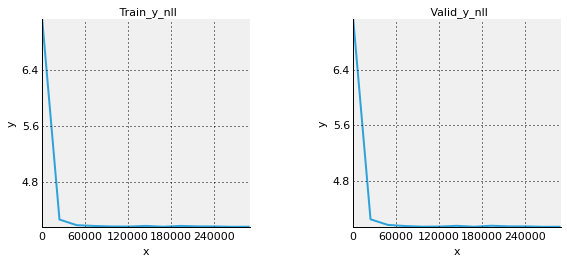

In [5]:
make_curves(m,*nll_channels)

Plotting all the monitoring channels at the same time, could see something interesting happening:

Train_objective            
      I : Curve.Train_objective   (y)
   Train_h6_col_norms_mean    
      I : Curve.Train_h6_col_norms_mean   (y)
   Train_h1_max_x_max_u       
      I : Curve.Train_h1_max_x_max_u   (y)
   Train_h5_kernel_norms_min  
      I : Curve.Train_h5_kernel_norms_min   (y)
   Train_h2_mean_x_max_u      
      I : Curve.Train_h2_mean_x_max_u   (y)
   Train_h6_row_norms_mean    
      I : Curve.Train_h6_row_norms_mean   (y)
   Train_h1_min_x_mean_u      
      I : Curve.Train_h1_min_x_mean_u   (y)
   Train_h1_range_x_max_u     
      I : Curve.Train_h1_range_x_max_u   (y)
   Train_h2_min_x_mean_u      
      I : Curve.Train_h2_min_x_mean_u   (y)
   Train_h1_min_x_max_u       
      I : Curve.Train_h1_min_x_max_u   (y)
   Train_h5_max_x_max_u       
      I : Curve.Train_h5_max_x_max_u   (y)
   Train_h6_range_x_mean_u    
      I : Curve.Train_h6_range_x_mean_u   (y)
   Train_h2_range_x_max_u     
      I : Curve.Train_h2_range_x_max_u   (y)
   Train_h2_kernel_norms_mean 
      I : Curve.Train_h2_kernel_norms_mean   (y)
   Train_h6_col_norms_min     
      I : Curve.Train_h6_col_norms_min   (y)
   Train_h6_min_x_min_u       
      I : Curve.Train_h6_min_x_min_u   (y)
   Train_h4_kernel_norms_min  
      I : Curve.Train_h4_kernel_norms_min   (y)
   Train_h4_mean_x_mean_u     
      I : Curve.Train_h4_mean_x_mean_u   (y)
   Train_h4_kernel_norms_max  
      I : Curve.Train_h4_kernel_norms_max   (y)
   Train_h3_mean_x_mean_u     
      I : Curve.Train_h3_mean_x_mean_u   (y)
   Train_h6_col_norms_max     
      I : Curve.Train_h6_col_norms_max   (y)
   Train_h6_max_x_min_u       
      I : Curve.Train_h6_max_x_min_u   (y)
   Train_h7_mean_x_max_u      
      I : Curve.Train_h7_mean_x_max_u   (y)
   Train_h3_kernel_norms_max  
      I : Curve.Train_h3_kernel_norms_max   (y)
   Train_term_0               
      I : Curve.Train_term_0   (y)
   Train_h6_max_x_mean_u      
      I : Curve.Train_h6_max_x_mean_u   (y)
   Train_h3_range_x_min_u     
      I : Curve.Train_h3_range_x_min_u   (y)
   Train_h4_range_x_min_u     
      I : Curve.Train_h4_range_x_min_u   (y)
   Train_h5_kernel_norms_max  
      I : Curve.Train_h5_kernel_norms_max   (y)
   Train_h3_max_x_min_u       
      I : Curve.Train_h3_max_x_min_u   (y)
   Train_h7_max_x_max_u       
      I : Curve.Train_h7_max_x_max_u   (y)
   Train_h3_min_x_mean_u      
      I : Curve.Train_h3_min_x_mean_u   (y)
   Train_h1_max_x_min_u       
      I : Curve.Train_h1_max_x_min_u   (y)
   Train_term_1_weight_decay  
      I : Curve.Train_term_1_weight_decay   (y)
   Train_h5_min_x_min_u       
      I : Curve.Train_h5_min_x_min_u   (y)
   Train_h7_row_norms_mean    
      I : Curve.Train_h7_row_norms_mean   (y)
   Train_h7_mean_x_mean_u     
      I : Curve.Train_h7_mean_x_mean_u   (y)
   Train_h5_max_x_mean_u      
      I : Curve.Train_h5_max_x_mean_u   (y)
   Train_h5_range_x_min_u     
      I : Curve.Train_h5_range_x_min_u   (y)
   Train_h3_max_x_max_u       
      I : Curve.Train_h3_max_x_max_u   (y)
   Train_h4_min_x_max_u       
      I : Curve.Train_h4_min_x_max_u   (y)
   Train_h4_mean_x_max_u      
      I : Curve.Train_h4_mean_x_max_u   (y)
   Train_h6_min_x_mean_u      
      I : Curve.Train_h6_min_x_mean_u   (y)
   Train_y_col_norms_min      
      I : Curve.Train_y_col_norms_min   (y)
   Train_h7_row_norms_min     
      I : Curve.Train_h7_row_norms_min   (y)
   Train_h7_col_norms_min     
      I : Curve.Train_h7_col_norms_min   (y)
   Train_h7_min_x_mean_u      
      I : Curve.Train_h7_min_x_mean_u   (y)
   Train_h5_min_x_max_u       
      I : Curve.Train_h5_min_x_max_u   (y)
   Train_h6_range_x_max_u     
      I : Curve.Train_h6_range_x_max_u   (y)
   Train_h4_range_x_max_u     
      I : Curve.Train_h4_range_x_max_u   (y)
   Train_h2_mean_x_mean_u     
      I : Curve.Train_h2_mean_x_mean_u   (y)
   Train_h2_max_x_min_u       
      I : Curve.Train_h2_max_x_min_u   (y)
   Train_h3_min_x_max_u       
      I : Curve.Train_h3_min_x_max_u   (y)
   Tr
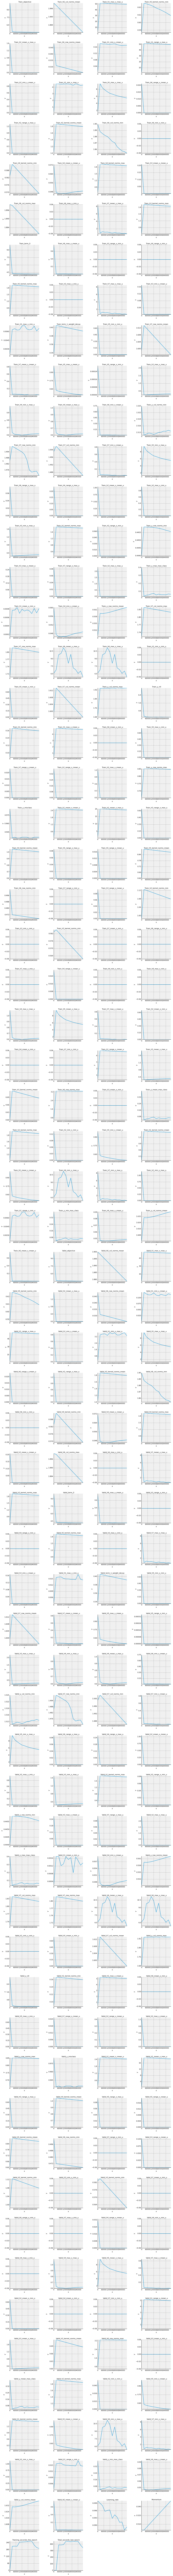

In [6]:
make_curves(m,*m.monitor.channels.keys())

Weights Learned
=====

We can look at the weights learned by this model compared with our most recent best model and see what the differences are. Although, this might be difficult to interpret.

In [7]:
%env PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh
%run ~/repos/pylearn2/pylearn2/scripts/show_weights.py /disk/scratch/neuroglycerin/models/8aug_extra_layers_more_hidden_recent.pkl

env: PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh
making weights report
loading model
loading done
smallest enc weight magnitude: 1.51593612827e-05
mean enc weight magnitude: 0.176430955529
max enc weight magnitude: 0.270493984222


In [8]:
from IPython.display import Image

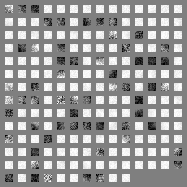

In [9]:
def plot_recent_pylearn2():
    pl2plt = Image(filename="/afs/inf.ed.ac.uk/user/s08/s0805516/tmp/pylearnplot.png", width=700)
    return pl2plt
plot_recent_pylearn2()

Later
==

__X__ hours after running the above, looked again.

making weights report
loading model
loading done
smallest enc weight magnitude: 1.45443946167e-05
mean enc weight magnitude: 0.169363990426
max enc weight magnitude: 0.259642511606


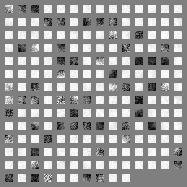

In [14]:
%run ~/repos/pylearn2/pylearn2/scripts/show_weights.py /disk/scratch/neuroglycerin/models/8aug_extra_layers_more_hidden_recent.pkl
plot_recent_pylearn2()